In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop(columns="CustomerID",inplace=True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


<ipython-input-21-42119d112c22>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True)


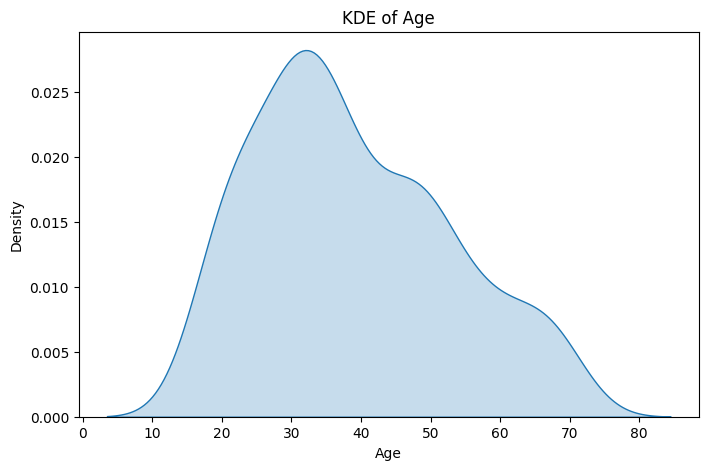

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Age'], shade=True)
plt.title('KDE of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

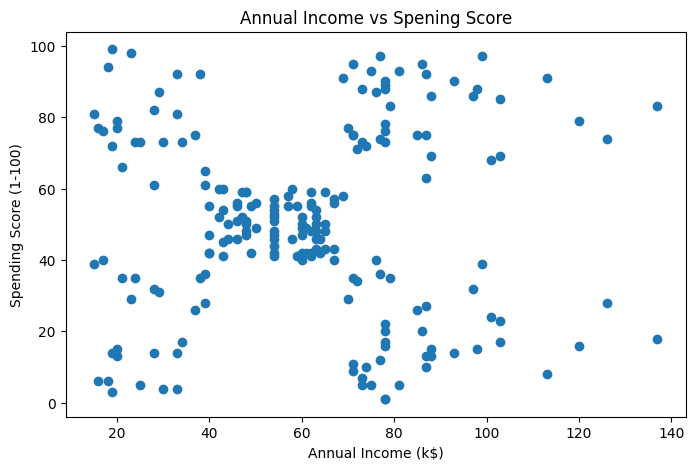

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spening Score")
plt.show()

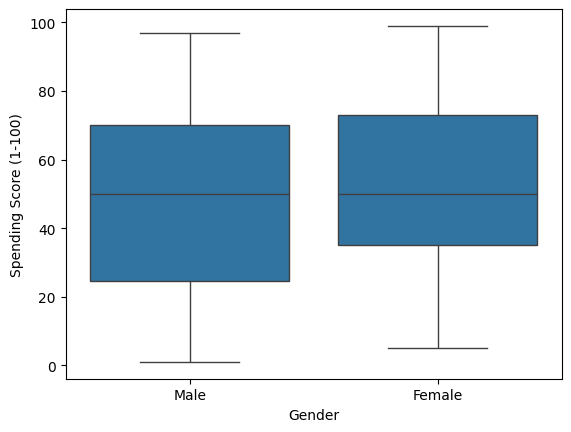

In [ ]:
sns.boxplot(x=df["Gender"],y=df["Spending Score (1-100)"])
plt.show()

In [ ]:
df["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


In [ ]:
df=df.iloc[:,2:4].values

Implementing K-Means Clustering

In [ ]:
wcss=[]

for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)


In [ ]:
wcss

[269981.28000000014,
 184740.39627314542,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 38463.49408903115,
 31676.36973205365,
 25354.360937251142,
 21916.79478984372,
 19785.35893031699]

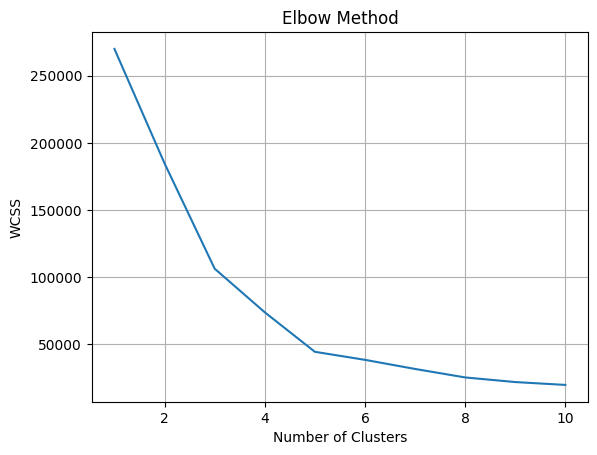

In [ ]:
plt.grid()
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.plot(range(1,11),wcss)
plt.show()

Optimum Number of Clusters = 5

In [ ]:
km=KMeans(n_clusters=5)
y_means=km.fit_predict(df)


In [ ]:
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

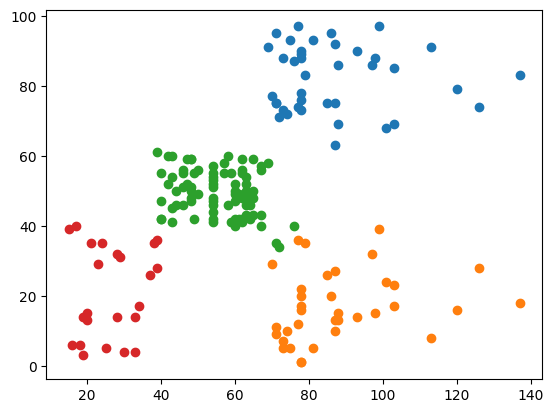

In [ ]:
plt.scatter(df[y_means==0,0],df[y_means==0,1])
plt.scatter(df[y_means==1,0],df[y_means==1,1])
plt.scatter(df[y_means==2,0],df[y_means==2,1])
plt.scatter(df[y_means==3,0],df[y_means==3,1])
plt.show()

In [ ]:

np.random.seed(42)

annual_income = np.random.randint(15, 140, 100)

spending_score = np.random.randint(1, 100, 100)

testing_data=np.array([annual_income,spending_score]).T

In [ ]:
test_labels=km.predict(testing_data)

In [ ]:
test_labels

array([1, 2, 0, 4, 1, 0, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 4, 4, 2,
       3, 1, 1, 2, 4, 4, 1, 0, 3, 3, 0, 2, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       0, 4, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 4, 0, 2, 4, 4, 1, 4, 3, 3, 1,
       0, 3, 1, 1, 4, 1, 0, 3, 0, 0, 0, 0, 2, 0, 1, 4, 2, 3, 1, 1, 2, 1,
       1, 4, 4, 4, 1, 0, 3, 2, 0, 2, 3, 1], dtype=int32)

In [ ]:
silhouette_avg=silhouette_score(testing_data,test_labels)
silhouette_avg

0.36044061578537906

0.5 to 1.0 (Good to Excellent):

Clusters are well-defined and distinct.
Points within each cluster are very similar to each other, and dissimilar to other clusters.
This is a good indication that the clustering algorithm worked effectively.

0.25 to 0.5 (Fair):

Clusters are moderately well-defined, but there is some overlap or ambiguity between clusters.
There might be some points on the boundary between clusters.
The clustering is acceptable, but it could be improved (e.g., by changing the number of clusters or algorithm settings).

0 to 0.25 (Poor):

Clusters are not well separated, and there is significant overlap between clusters.
The algorithm may have made incorrect cluster assignments, or the chosen number of clusters might not be appropriate.
Consider adjusting the clustering algorithm, the number of clusters, or the feature space.

Negative values (Below 0):

Points are likely assigned to the wrong clusters.
Significant overlap exists between clusters, and the clustering solution is poor.
You may need to reevaluate the clustering approach, such as choosing a different algorithm, modifying parameters, or examining the data for outliers or noise.

Implementing AgglomerativeClustering

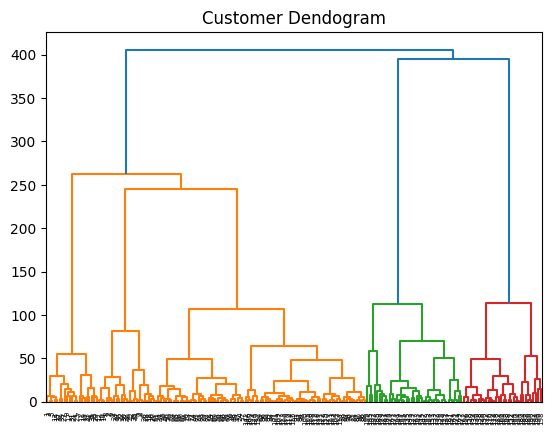

In [ ]:
import scipy.cluster.hierarchy as sch
plt.title("Customer Dendogram")
dendogram=sch.dendrogram(sch.linkage(df,method="ward"))

In [ ]:
cluster=AgglomerativeClustering(n_clusters=5,metric="euclidean",linkage="ward")

In [ ]:
labels_=cluster.fit_predict(df)

In [ ]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

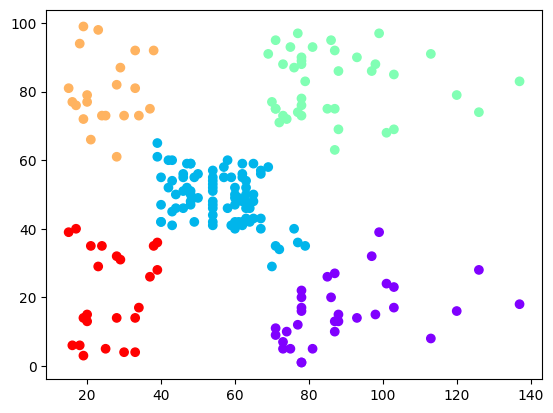

In [ ]:
plt.scatter(df[:,0],df[:,1],c=cluster.labels_,cmap="rainbow")
plt.show()